# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 





# STEP #0: PROBLEM STATEMENT

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: IMPORTING DATA

In [73]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation

import random
import seaborn as sns
from fbprophet import Prophet

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
# dataframes creation for both training and testing datasets 
hazelnut = pd.read_excel('hazelnut.xlsx')


# STEP #2: EXPLORING THE DATASET  

In [76]:
#Let's check for missing data

hazelnut.isnull().sum()

date        0
price    3543
dtype: int64

In [77]:
# Let's view the head of the training dataset
hazelnut.head(2)

,date,price
0,2005-01-01,NaN
1,2005-01-02,NaN


In [78]:
# Let's view the last elements in the training dataset
hazelnut.tail(2)

,date,price
5627,2020-05-29,22.47
5628,2020-05-30,NaN


In [79]:
#chekcing the data types

hazelnut.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [80]:
hazelnut = hazelnut.sort_values("date")

In [81]:
#checking the initial and last dates

hazelnut['date'].head(),hazelnut['date'].tail()

(0   2005-01-01
 1   2005-01-02
 2   2005-01-03
 3   2005-01-04
 4   2005-01-05
 Name: date, dtype: datetime64[ns], 5624   2020-05-26
 5625   2020-05-27
 5626   2020-05-28
 5627   2020-05-29
 5628   2020-05-30
 Name: date, dtype: datetime64[ns])

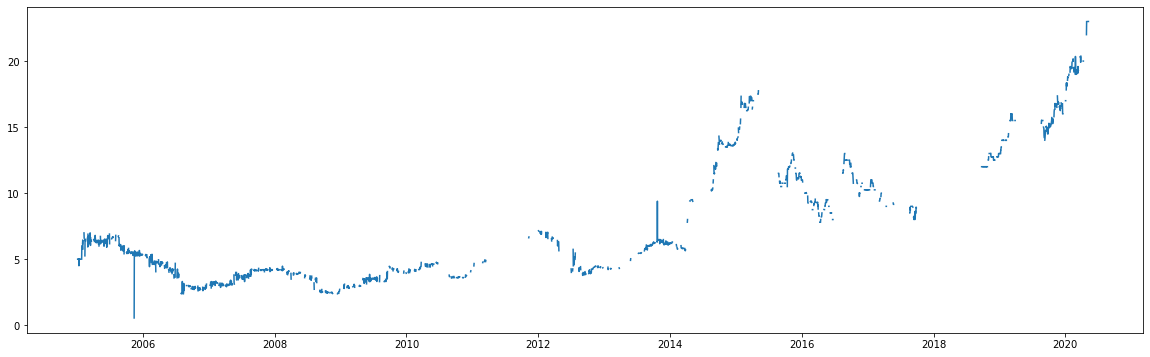

In [82]:
plt.figure(figsize=(20,6))
plt.plot(hazelnut['date'], hazelnut['price'])

In [83]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [84]:
#a basic imputation
print(hazelnut.isnull().sum())
hazelnut = hazelnut.fillna(method='ffill')
print(hazelnut.isnull().sum())

date        0
price    3543
dtype: int64
date     0
price    4
dtype: int64


In [85]:
#a basic imputation
print(hazelnut.isnull().sum())
hazelnut = hazelnut.fillna(method='bfill')
print(hazelnut.isnull().sum())

date     0
price    4
dtype: int64
date     0
price    0
dtype: int64


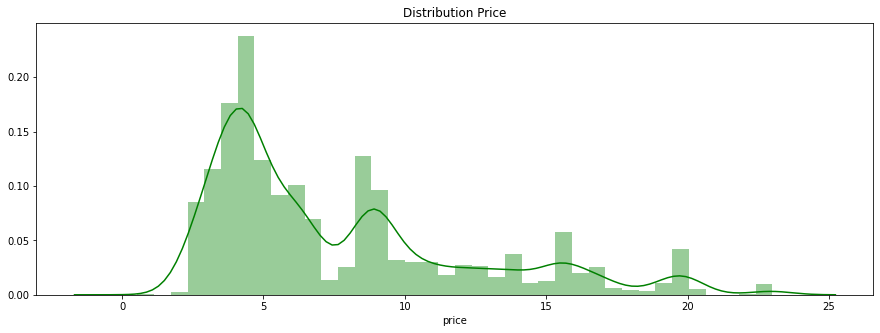

In [86]:
#Let's look at the price distribution
pl.figure(figsize=(15,5))
pl.title("Distribution Price")
ax = sns.distplot(hazelnut["price"], color = 'g')

In [87]:
hazelnut.shape

(5629, 2)

In [88]:
hazelnut.head()

,date,price
0,2005-01-01,5.0
1,2005-01-02,5.0
2,2005-01-03,5.0
3,2005-01-04,5.0
4,2005-01-05,5.0


# STEP 3: MAKE PREDICTIONS

In [89]:
hazelnut = hazelnut.rename(columns={'date':'ds', 'price':'y'})


In [90]:
hazelnut.shape

(5629, 2)

In [91]:
hazelnut.head()

,ds,y
0,2005-01-01,5.0
1,2005-01-02,5.0
2,2005-01-03,5.0
3,2005-01-04,5.0
4,2005-01-05,5.0



- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [92]:
m = Prophet()
m.fit(hazelnut)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
# Forcasting into the future
future_complete = m.make_future_dataframe(periods=365)
forecast_complete = m.predict(future_complete)

In [94]:
forecast_complete[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,5.955641,4.668664,7.410001
1,2005-01-02,5.956713,4.508568,7.289238
2,2005-01-03,5.967790,4.609956,7.260205
3,2005-01-04,5.985655,4.578614,7.380361
4,2005-01-05,6.003310,4.602869,7.325223


In [95]:
forecast_complete.to_excel('forecast2.xlsx', engine='xlsxwriter')  

In [96]:
error_missingData =  mean_absolute_error(avocado_prophet_df['y'], forecast_complete[0:avocado_prophet_df.shape[0]]['yhat'])
print("MAE with missing data", error_missingData)

MAE with missing data 0.709322143557816


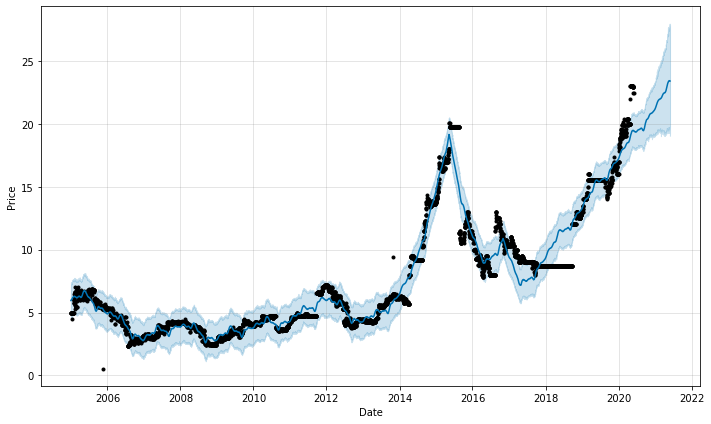

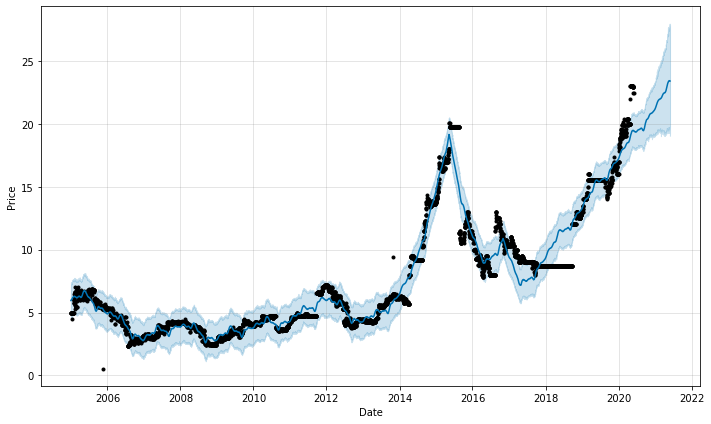

In [97]:
m.plot(forecast_complete, xlabel='Date', ylabel='Price')

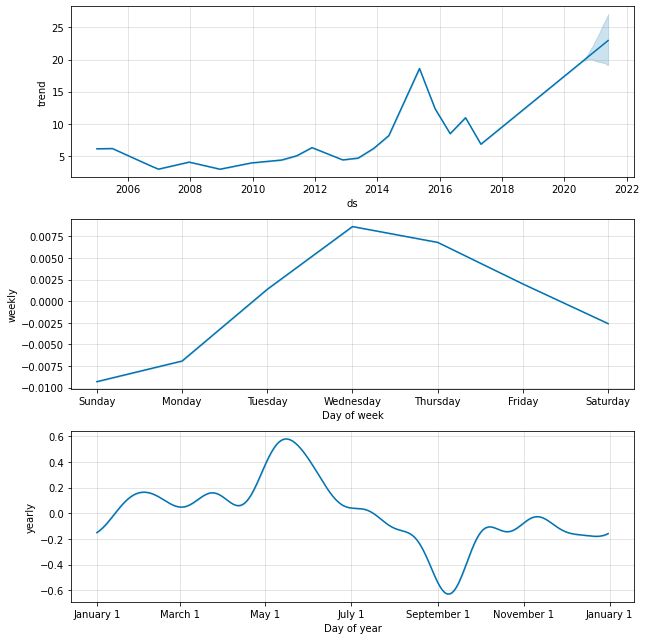

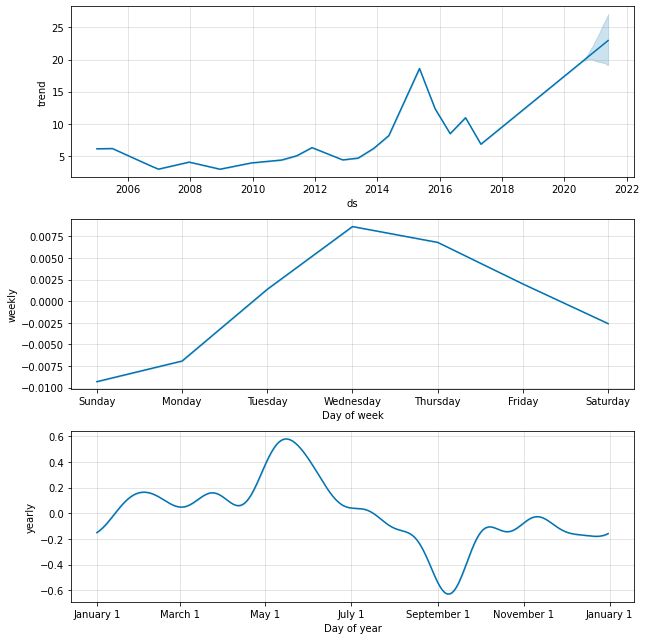

In [98]:
m.plot_components(forecast_complete)